In [1]:
from IPython.display import Image
%matplotlib inline

# Dodecane

500 molecules of dodecane

In [54]:
import os
from matplotlib import pyplot as plt
from pylab import rcParams
import matplotlib.gridspec as gridspec
import seaborn as sns
from collections import defaultdict
sns.set(style='ticks', palette='Set2')
dt = 0.001

def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError("smooth only accepts 1 dimension arrays.")
        if x.size < window_len:
                raise ValueError("Input vector needs to be bigger than window size.")
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
        s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=numpy.ones(window_len,'d')
        else:  
                w=eval('numpy.'+window+'(window_len)')
        y=numpy.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]


# configuration of csv columns
csv_cols = {'time': 1,
            'T': 2, 
            'Ek': 3,
            'res': 4,
            'lj': 5, 
            'bond_at': 6, 
            'bond_cg': 7,
            'bond_cross': 8,
            'angle_1': 9,
            'angle_2': 10,
            'angle_3': 11,
            'dih_1': 12, 
            'dih_2': 13,
            '14lj-1': 14,
            '14lj-2': 15,
            'Epot': (5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15),
            'bonds': (6, 7, 8),
            'angles': (9, 10, 11),
            'dihedrals': (12, 13),
            'LJ': (5, 14, 15)
           }
ref_cols = {'time': 1,
            'T': 2, 
            'Ek': 3, 
            'lj': 4, 
            'bond': 5, 
            'angle': 6,
            'dih': 7, 
            '14lj-1': 8, 
            '14lj-2':9,
            'LJ': (4, 8, 9),
            'Epot': (4, 5, 6, 7, 8, 9)
           }

In [55]:
RT = 8.314 * 298.0 * 10**-3
print(RT)

2.4775720000000003


In [56]:
ref_data = np.loadtxt('speed_data/ref_aa.csv', skiprows=1)
ref_data[:, 4:] = ref_data[:, 4:]
std_ref_data = np.std(ref_data, ddof=0, axis=0)
# Load all .csv files
data = {
    (float(k.split('_')[1]), k.split('_')[0], k.split('_')[2]): np.loadtxt('speed_data/{}'.format(k), skiprows=1) 
    for k in os.listdir('speed_data') if k.startswith('sim')
}
res_data = defaultdict(list)
for r, f, s in data:
    data[(r, f, s)][:, 4:] = data[(r, f, s)][:, 4:] / (RT * 6000.0)
    res_data[r].append(data[(r, f, s)])

In [74]:
rcParams.update({'font.size': 12, 
                 'legend.fontsize': 16, 
                 'axes.titlesize': 16,
                 'axes.labelsize': 16,
                 'xtick.labelsize': 12, 
                 'ytick.labelsize': 12,
                 })

dt = 0.001
res2color = {
    0.00001: 0,
    0.00002: 1,
    0.00003: 2,
    0.00004: 3,
    0.00005: 4,
    0.00006: 19,
    0.00008: 5,
    0.00009: 15,
    0.0001: 6,
    0.0002: 7,
    0.0003: 8,
    0.0004: 9,
    0.0005: 10,
    0.0007: 17,
    0.0008: 11,
    0.0009: 16,
    0.001: 12,
    0.002: 14,
    'aa': 13
    }

res2marker = {
    'aa': 'o',
    0.001: 'h',
    0.0005: 's',
    5e-05: '*'
}

plot_colors = np.array([
    (197,27,125),
    (31, 120, 180),
    (178, 223, 138),
    (51, 160, 44),
    (251, 154, 153),
    (227, 26, 28),  # 5
    (253, 191, 111),
    (255, 127, 0),
    (202, 178, 214),
    (106, 61, 154),
    (166,86,40), # 10
    (177, 89, 40), ## color palet 
    (57, 106, 177), 
    (118,42,131), # 13
    (104, 37, 41), 
    (83, 81, 84), 
    (107, 76, 154),
    (146, 36, 40),
    (148, 139, 61),
    (137, 61, 57),
    ]) / 255.0
fonttitle=16
fontother=12
test2res = {
    'test_2': 0.0005,
    'test_15': 0.00005,
    'test_1': 0.001
}

In [72]:
# Makes averages and calculates std.
avg_res_data, all_res_data, std_res_data = {}, {}, {}  # indexed by alpha value
for r in res_data:
    if r in [0.001, 0.00005, 0.0005]:
        avg_res_data[r] = np.average(res_data[r], axis=0)
        std_res_data[r] = np.std(res_data[r], axis=0, ddof=1)
    all_res_data[r] = np.average(res_data[r], axis=0)

print('Cols={}'.format(list(enumerate(open('speed_data/sim0energy_0.0005_.csv').readline().split()))))
print('Ref Cols={}'.format(list(enumerate(open('speed_data/ref_aa.csv').readline().split()))))

Cols=[(0, 'step'), (1, 'time'), (2, 'T'), (3, 'Ekin'), (4, 'res'), (5, 'lj'), (6, 'bond_2'), (7, 'bond_3_cross'), (8, 'bond_2_cross'), (9, 'angle_5_cross'), (10, 'angle_6_cross'), (11, 'angle_4_cross'), (12, 'dihedral_0_cross'), (13, 'dihedral_1_cross'), (14, 'lj-14_0_cross'), (15, 'lj-14_1_cross')]
Ref Cols=[(0, 'step'), (1, 'time'), (2, 'T'), (3, 'Ekin'), (4, 'lj'), (5, 'bond_2'), (6, 'angle_4'), (7, 'dihedral_0'), (8, 'lj-14_0'), (9, 'lj-14_1')]


# Potential energy

5e-05
0.0005
0.001


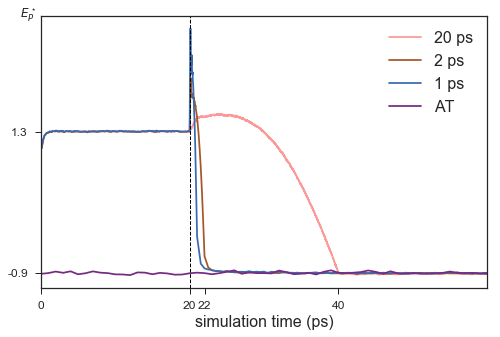

In [87]:
# Potential energy
rcParams['figure.figsize'] = 8, 5

plt.annotate(r'$E_P^\star$', xy=(-0.01, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')
#yticks = [-2.210,3.870,7.095]
yticks = []
for r in sorted(avg_res_data):
    print(r)
    data = np.sum(avg_res_data[r][:, csv_cols['Epot']], axis=1)
    std_data = np.sqrt(np.sum(std_res_data[r][:, csv_cols['Epot']]**2, axis=1))
    plt.plot(avg_res_data[r][:,0]*dt,  data, color=plot_colors[res2color[r]], 
                 label='{:.0f} ps'.format(dt/r).rstrip('0'))
yticks.append(np.average(np.sum(avg_res_data[0.00005][:, csv_cols['Epot']], axis=1)[:100]))
#ax1.set_xlim(0, 50)
ref_data_epot = np.sum(ref_data[:, ref_cols['Epot']][200:400], axis=1) / (RT * 6000.0)
yticks.append(np.average(ref_data_epot))
plt.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_epot,
    color=plot_colors[res2color['aa']],
    label='AT',
    )
plt.axvline(x=20.0, linestyle='--', linewidth=1.0, color='k')
plt.xticks([
        0.0,
        20.0,
        20.0 + dt/0.00005,
        20.0 + dt/0.0005,
    ])
plt.yticks(yticks, map(r'{:.1f}'.format, yticks))
plt.xlabel('simulation time (ps)')
plt.xlim(xmin=0,xmax=60)
#plt.title('Change in total potential energy during backmapping')
plt.legend() #, title=r'$\Delta t / \alpha$')
plt.savefig('dod_total_potential_energy.pdf', dpi=200, bbox_inches='tight')
# plt.savefig('dod_total_potential_energy.png', dpi=200, bbox_inches='tight')

### Average values for total potential energy and temperature

In [8]:
## Average value for potential energy
print('Average value of potential energy for different resolution in the CG region')
for r in avg_res_data:
    print 'res=', r, 'avg cg=', np.average(np.sum(avg_res_data[r][:, csv_cols['Epot']][:200], axis=1)), 'std=', np.sqrt(np.sum(std_res_data[r][:, csv_cols['Epot']][:200]**2))

print('\nAverage value of potential energy for different resolution after backmapping')
for r in avg_res_data:
    print 'res=', r, 'avg aa=', np.average(np.sum(avg_res_data[r][:, csv_cols['Epot']][205+1.0/r:], axis=1)), 'std=', np.sqrt(np.sum(std_res_data[r][:, csv_cols['Epot']][200+1.0/r:]**2))

Average value of potential energy for different resolution in the CG region
res= 0.0005 avg cg= 1.27499534305 std= 0.189816672287
res= 0.001 avg cg= 1.27645209659 std= 0.18858273723
res= 5e-05 avg cg= 1.27626177434 std= 0.189125576527

Average value of potential energy for different resolution after backmapping
res= 0.0005 avg aa= -0.894814738195 std= 0.177033595195
res= 0.001 avg aa= -0.88968182566 std= 0.17669236874
res= 5e-05 avg aa= -0.902791998672 std= 0.173950875039


/home/teodor/.local/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [9]:
# Reference values for total potential energy
print 'Reference values'
print 'avg=', np.average(np.sum(ref_data[:, ref_cols['Epot']], axis=1) / (RT * 6000.0))
print 'std=', np.std(np.sum(ref_data[:, ref_cols['Epot']], axis=1) / (RT * 6000.0), ddof=1)
print 'std error=', np.std(np.sum(ref_data[:, ref_cols['Epot']], axis=1) / (RT * 6000.0), ddof=1)/np.sqrt(np.sum(ref_data[:, ref_cols['Epot']], axis=1).shape[0] - 1)

Reference values
avg= -0.895583260304
std= 0.0170834123677
std error= 0.000170834123677


In [10]:
# Temperature
print('Reference values of temperature')
print('T avg={}'.format(np.average(ref_data[:, ref_cols['T']])/0.0083144621))
print('T std={}'.format(np.std(ref_data[:, ref_cols['T']])/0.0083144621))

print('\nAverage temperature in CG region')
for r in avg_res_data:
    print r, 'T_cg avg=', np.average(avg_res_data[r][:, csv_cols['T']][:200])/0.0083144621, 'std=', np.sqrt(np.sum((std_res_data[r][:, csv_cols['T']][:200]/0.0083144621)**2))

print('\nAverage temperature in AT region')
for r in avg_res_data:
    print r, 'T_AT avg=', np.average(avg_res_data[r][:, csv_cols['T']][218+1.0/r:])/0.0083144621, 'std=', np.sqrt(np.sum((std_res_data[r][:, csv_cols['T']][218+1.0/r:]/0.0083144621)**2))



Reference values of temperature
T avg=297.975734739
T std=3.40482491396

Average temperature in CG region
0.0005 T_cg avg= 297.765698216 std= 46.4335062059
0.001 T_cg avg= 297.865754298 std= 45.003389678
5e-05 T_cg avg= 297.810160654 std= 44.7278473195

Average temperature in AT region
0.0005 T_AT avg= 299.534578503 std= 28.2752634994
0.001 T_AT avg= 299.433680134 std= 29.3687878529
5e-05 T_AT avg= 299.350940356 std= 29.2424645762


/home/teodor/.local/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


## Supportive material - contribution to total potential energy

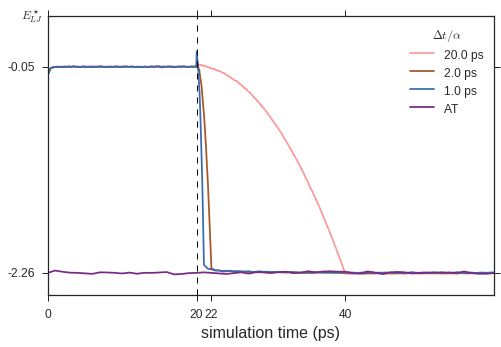

In [11]:
rcParams['figure.figsize'] = 8, 5

# LJ
yticks = []
plt.annotate(r'$E_{LJ}^\star$', xy=(-0.01, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')
for r in sorted(avg_res_data):
    data = np.sum(avg_res_data[r][:, csv_cols['LJ']], axis=1)
    plt.plot(
        avg_res_data[r][:,0]*dt, 
        data, 
        color=plot_colors[res2color[r]],
        label='{} ps'.format(dt/r))
yticks.append(np.average(np.sum(avg_res_data[0.00005][:, csv_cols['LJ']], axis=1)[:100]))
ref_data_lj = np.sum(ref_data[:, ref_cols['LJ']][200:400], axis=1) / (6000.0*RT)

yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )
plt.axvline(x=20.0, linestyle='--', linewidth=1.0, color='k')
plt.yticks(yticks, map('{:.2f}'.format, yticks))
plt.xlim(xmax=60)
#plt.ylim([-6, 1])
plt.xticks([0.0, 20.0, 20.0 + dt/0.00005, 20.0 + dt/0.0005])
plt.xlabel('simulation time (ps)')
plt.legend(title=r'$\Delta t / \alpha$', fontsize=fontother, bbox_to_anchor=(1.0, 1.0), ncol=1, loc='upper right')
plt.savefig('dod_lj_change.pdf', dpi=300, bbox_inches='tight')

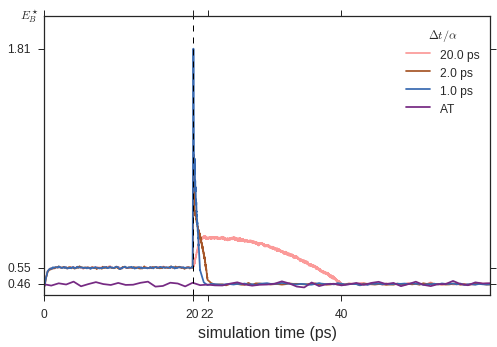

In [12]:
rcParams['figure.figsize'] = 8, 5

# Bond
yticks = []
plt.annotate(r'$E_{B}^\star$', xy=(-0.01, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')
max_y = 0.0
for r in sorted(avg_res_data):
    data = np.sum(avg_res_data[r][:, csv_cols['bonds']], axis=1)
    plt.plot(
        avg_res_data[r][:,0]*dt, 
        data, 
        color=plot_colors[res2color[r]],
        label='{} ps'.format(dt/r))
    max_y = max(max_y, np.max(data))
    
yticks.append(np.average(np.sum(avg_res_data[0.00005][:, csv_cols['bonds']], axis=1)[:100]))
yticks.append(max_y)

ref_data_lj = ref_data[:, ref_cols['bond']][200:400] / (6000.0*RT)
yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )

plt.axvline(x=20.0, linestyle='--', linewidth=1.0, color='k')
plt.yticks(yticks, map('{:.2f}'.format, yticks))
plt.xlim(xmax=60)
plt.xticks([0.0, 20.0, 20.0 + dt/0.00005, 20.0 + dt/0.0005])
plt.xlabel('simulation time (ps)')
plt.legend(title=r'$\Delta t / \alpha$', fontsize=fontother, bbox_to_anchor=(1.0, 1.0), 
           ncol=1, loc='upper right', frameon=False)
plt.savefig('dod_bond_change.pdf', dpi=300, bbox_inches='tight')

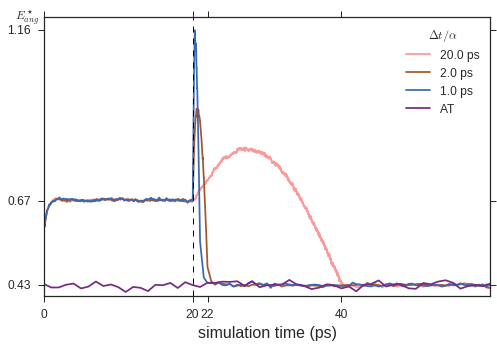

In [13]:
rcParams['figure.figsize'] = 8, 5
# Angle
yticks = []
plt.annotate(r'$E_{ang}^\star$', xy=(-0.01, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')
max_y = 0.0
for r in sorted(avg_res_data):
    data = np.sum(avg_res_data[r][:, csv_cols['angles']], axis=1)
    plt.plot(
        avg_res_data[r][:,0]*dt, 
        data, 
        color=plot_colors[res2color[r]],
        label='{} ps'.format(dt/r))
    max_y = max(max_y, np.max(data))
    
yticks.append(np.average(np.sum(avg_res_data[0.00005][:, csv_cols['angles']], axis=1)[:100]))
yticks.append(max_y)

ref_data_lj = ref_data[:, ref_cols['angle']][200:400] / (6000.0 * RT)
yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )

plt.axvline(x=20.0, linestyle='--', linewidth=1.0, color='k')
plt.yticks(yticks, map('{:.2f}'.format, yticks))
plt.xlim(xmax=60)
plt.xticks([0.0, 20.0, 20.0 + dt/0.00005, 20.0 + dt/0.0005])
plt.xlabel('simulation time (ps)')
plt.legend(title=r'$\Delta t / \alpha$', fontsize=fontother, 
           bbox_to_anchor=(1.0, 1.0), ncol=1, loc='upper right', frameon=False)
plt.savefig('dod_angle_change.pdf', dpi=300, bbox_inches='tight')

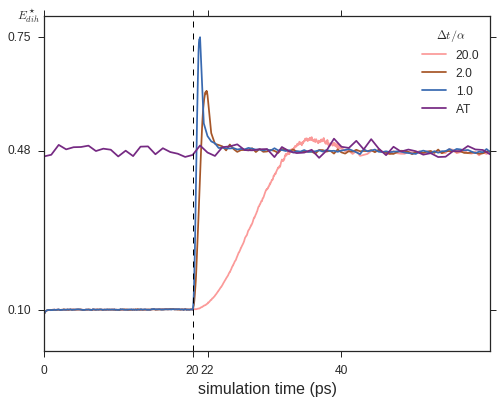

In [14]:
rcParams['figure.figsize'] = 8, 6

# Dihedral
yticks = []
plt.annotate(r'$E_{dih}^\star$', xy=(-0.01, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')
max_y = 0.0
for r in sorted(avg_res_data):
    data = np.sum(avg_res_data[r][:, csv_cols['dihedrals']], axis=1)
    plt.plot(
        avg_res_data[r][:,0]*dt, 
        data, 
        color=plot_colors[res2color[r]],
        label='{}'.format(dt/r))
    max_y = max(max_y, np.max(data))
    
yticks.append(np.average(np.sum(avg_res_data[0.00005][:, csv_cols['dihedrals']], axis=1)[:100]))
yticks.append(max_y)

ref_data_lj = ref_data[:, ref_cols['dih']][200:400] / (6000.0 * RT)
yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )

plt.axvline(x=20.0, linestyle='--', linewidth=1.0, color='k')
plt.yticks(yticks, map('{:.2f}'.format, yticks))
plt.xlim(xmax=60)
plt.xticks([0.0, 20.0, 20.0 + dt/0.00005, 20.0 + dt/0.0005])
plt.xlabel('simulation time (ps)')
plt.legend(title=r'$\Delta t / \alpha$', fontsize=fontother, 
           bbox_to_anchor=(1.0, 1.0), ncol=1, loc='upper right', frameon=False)
plt.savefig('dod_dih_change.pdf', dpi=300, bbox_inches='tight')

### Coarse-grained potentials

Software: VOTCA

In [15]:
cg_dir = 'cg_ibi/'
cg_files = {f: np.loadtxt(os.path.join(cg_dir, f), usecols=(0, 1)) for f in os.listdir(cg_dir)}

#### bonded potentials

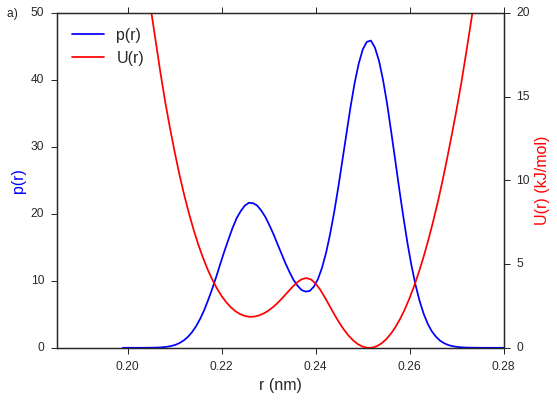

In [16]:
plt.rcParams['figure.figsize'] = (8, 6)
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['bond.hist'][:, 0], cg_files['bond.hist'][:, 1], 'b', label='p(r)')
ax1.set_xlabel('r (nm)')
ax1.set_ylabel('p(r)', color='b')
ax1.set_xlim([0.2, 0.28])

ax1.annotate(r'a) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

# And plot the potential
ax2 = ax1.twinx()
lns2 = ax2.plot(cg_files['table_b1.xvg'][:, 0], cg_files['table_b1.xvg'][:, 1], 'r', label='U(r)')
ax2.set_ylim([0, 20])
ax2.set_xlim([0.185, 0.28])
ax2.set_ylabel('U(r) (kJ/mol)', color='r')

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=2)
fig.savefig('dod_cg_ibi_bonded.pdf', dpi=300, bbox_inches='tight')

#### angle distribution

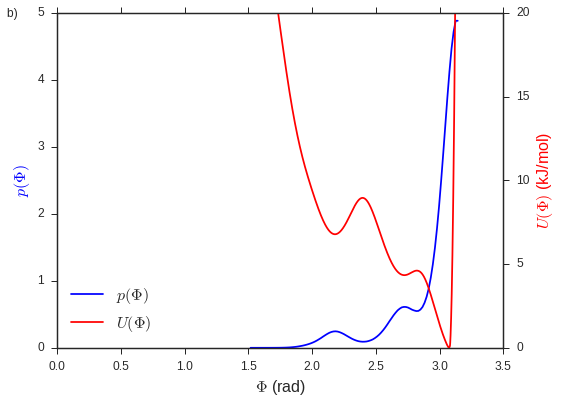

In [17]:
plt.rcParams['figure.figsize'] = (8, 6)
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['angle_ch2.hist'][:, 0], cg_files['angle_ch2.hist'][:, 1], 'b', label=r'$p(\Phi)$')
ax1.set_xlabel(r'$\Phi$ (rad)')
ax1.set_ylabel(r'$p(\Phi)$', color='b')

ax1.annotate(r'b) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

# And plot the potential
ax1b = ax1.twinx()
lns2 = ax1b.plot(np.deg2rad(cg_files['table_a1.xvg'][:, 0]), cg_files['table_a1.xvg'][:, 1], 'r', label=r'$U(\Phi)$')
ax1b.set_ylim([0, 20])
ax1b.set_ylabel(r'$U(\Phi)$ (kJ/mol)', color='r')

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1b.legend(lns, labs, loc=3)

fig.savefig('dod_cg_ibi_angles.pdf', dpi=300, bbox_inches='tight')

#### dihedral

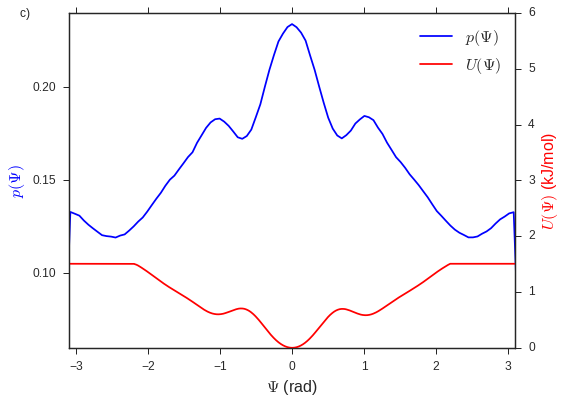

In [18]:
plt.rcParams['figure.figsize'] = (8, 6)
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['dihedral.hist'][:, 0], cg_files['dihedral.hist'][:, 1], 'b', label=r'$p(\Psi)$')
ax1.set_xlabel(r'$\Psi$ (rad)')
ax1.set_ylabel(r'$p(\Psi)$', color='b')

ax1.annotate(r'c) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

# And plot the potential
ax1b = ax1.twinx()
lns2 = ax1b.plot(np.deg2rad(cg_files['table_d1.xvg'][:, 0]), cg_files['table_d1.xvg'][:, 1], 'r', label=r'$U(\Psi)$')
ax1b.set_ylim([0, 6])
ax1b.set_xlim([-3.1, 3.1])
ax1b.set_ylabel(r'$U(\Psi)$ (kJ/mol)', color='r')

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1b.legend(lns, labs, loc=1)

fig.savefig('dod_cg_ibi_dih.pdf', dpi=300, bbox_inches='tight')

#### non-bonded

/home/teodor/.local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


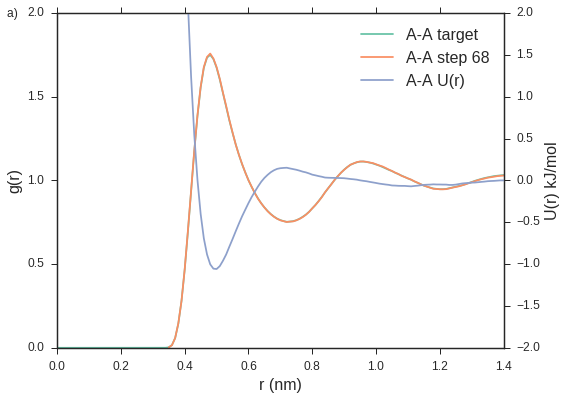

In [19]:
import itertools
plt.rcParams['figure.figsize'] = (8, 6)
palette = itertools.cycle(sns.color_palette())
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['A-A.dist.tgt'][:, 0], cg_files['A-A.dist.tgt'][:, 1], color=next(palette), 
                label='A-A target')
lns2 = ax1.plot(cg_files['A-A.dist.68'][:, 0], cg_files['A-A.dist.68'][:, 1], color=next(palette), 
                label='A-A step 68')
ax1.set_xlim([0.0, 1.4])
ax1.set_ylim([0.0, 2.0])
ax1.set_ylabel('g(r)')
ax1.set_xlabel('r (nm)')

ax1.annotate(r'a) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

ax2 = ax1.twinx()
lns3 = ax2.plot(cg_files['A-A.pot.new'][:, 0], cg_files['A-A.pot.new'][:, 1], color=next(palette), 
                label='A-A U(r)')
ax2.set_ylabel('U(r) kJ/mol')
ax2.set_ylim([-2, 2])
ax2.set_xlim([0.0, 1.4])
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=1)
fig.savefig('dod_cg_ibi_A_A.pdf', dpi=300, bbox_inches='tight')

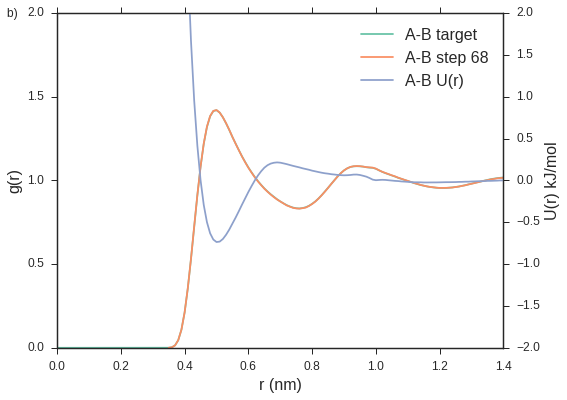

In [20]:
import itertools
plt.rcParams['figure.figsize'] = (8, 6)
palette = itertools.cycle(sns.color_palette())
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['A-B.dist.tgt'][:, 0], cg_files['A-B.dist.tgt'][:, 1], color=next(palette), 
                label='A-B target')
lns2 = ax1.plot(cg_files['A-B.dist.68'][:, 0], cg_files['A-B.dist.68'][:, 1], color=next(palette), 
                label='A-B step 68')
ax1.set_xlim([0.0, 1.4])
ax1.set_ylim([0.0, 2.0])
ax1.set_ylabel('g(r)')
ax1.set_xlabel('r (nm)')

ax1.annotate(r'b) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

ax2 = ax1.twinx()
lns3 = ax2.plot(cg_files['A-B.pot.new'][:, 0], cg_files['A-B.pot.new'][:, 1], color=next(palette), 
                label='A-B U(r)')
ax2.set_ylabel('U(r) kJ/mol')
ax2.set_ylim([-2, 2])
ax2.set_xlim([0.0, 1.4])
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=1)
fig.savefig('dod_cg_ibi_A_B.pdf', dpi=300, bbox_inches='tight')

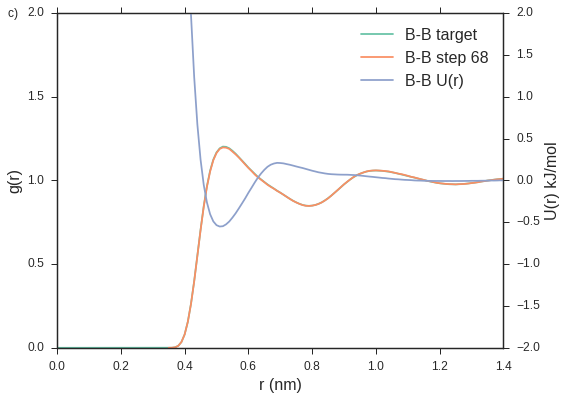

In [21]:
import itertools
plt.rcParams['figure.figsize'] = (8, 6)
palette = itertools.cycle(sns.color_palette())
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['B-B.dist.tgt'][:, 0], cg_files['B-B.dist.tgt'][:, 1], color=next(palette), 
                label='B-B target')
lns2 = ax1.plot(cg_files['B-B.dist.68'][:, 0], cg_files['B-B.dist.68'][:, 1], color=next(palette), 
                label='B-B step 68')
ax1.set_xlim([0.0, 1.4])
ax1.set_ylim([0.0, 2.0])
ax1.set_ylabel('g(r)')
ax1.set_xlabel('r (nm)')

ax1.annotate(r'c) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

ax2 = ax1.twinx()
lns3 = ax2.plot(cg_files['B-B.pot.new'][:, 0], cg_files['B-B.pot.new'][:, 1], color=next(palette), 
                label='B-B U(r)')
ax2.set_ylabel('U(r) kJ/mol')
ax2.set_ylim([-2, 2])
ax2.set_xlim([0.0, 1.4])
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=1)
fig.savefig('dod_cg_ibi_B_B.pdf', dpi=300, bbox_inches='tight')

# Conformational data

### compare distributions

#### rdf

In [17]:
def square_diff(dist_1, dist_2):
    dict_dist_1 = dict(dist_1[:, (0, 1)])
    dict_dist_2 = dict(dist_2[:, (0, 1)])
    diff = 0.0
    for k in dict_dist_1:
        if k in dict_dist_2:
            d = dict_dist_1[k] - dict_dist_2[k]
            diff += np.power(d, 2)
    return diff

def square_diff2(dist_1, dist_2):
    diff = dist_2 - dist_1
    return np.nansum(np.power(diff, 2))

def ks_test(cdf1, cdf2):
    """Kolmogorov-Smirnov two sample test"""
    distance = np.max(cdf1 - cdf2)
    N = len(cdf1)
    M = len(cdf2)
    pref = np.sqrt((N*M) / (M+N))
    c_a = 1.36  # c(0.005)
    accept_null = distance < c_a*pref#  /np.sqrt(N)
    return pref, distance, accept_null
def ecf(histogram, bins, normalize=False):
    """Computes empirical cumulative distribution with given bins"""
    if normalize:
        n = sum(histogram)
    else:
        n = 1.0
    return np.array([np.sum([y for x, y in histogram if x < xl]) for xl in bins]) / n

In [13]:
struct_dir = 'structural_data/'
rdf_dir = '{}/rdf'.format(struct_dir)

In [14]:
struct_data = {
    f: np.loadtxt('{}/{}'.format(struct_dir, f), usecols=(0, 1)) 
    for f in os.listdir(struct_dir)
    if os.path.isfile(os.path.join(struct_dir, f))
}

(1.0, 1.4)

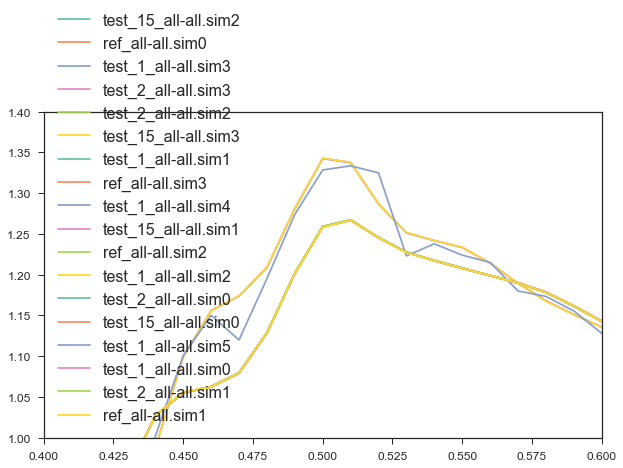

In [15]:
# The rdf will for atomistic particles (with excluded of bonded terms)
rdf_data = defaultdict(list)
for f in os.listdir(rdf_dir):
    if not os.path.isfile(os.path.join(rdf_dir, f)):
        continue
    t = '_'.join(f.split('_')[:2])
    d = np.loadtxt(os.path.join(rdf_dir, f), usecols=(0, 1))
    plt.plot(d[:, 0], d[:, 1], label=f)
    if f.startswith('ref'):
        rdf_data['aa'].append(d)
    else:
        r = test2res[t]
        rdf_data[r].append(d)
plt.legend()
plt.xlim([0.4, 0.6])
plt.ylim([1.0, 1.4])

In [25]:
rdf_f_values = defaultdict(list)
for k in rdf_data:
    for ar in rdf_data['aa']:
        for ak in rdf_data[k]:
            f = square_diff2(ar, ak)
            rdf_f_values[k].append(f)

In [26]:
for k in rdf_f_values:
    print(k, np.average(rdf_f_values[k]), scipy.stats.sem(rdf_f_values[k]))

5e-05 0.0229510167856 0.0102615559173
aa 5.00617438439e-06 8.01404749921e-07
0.001 0.0267563232719 0.00799702480165
0.0005 0.0228442981732 0.010214009046


5e-05
aa
0.001
0.0005


(1.0, 1.4)

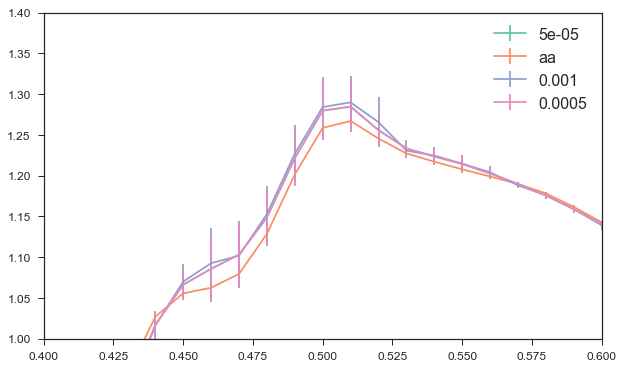

In [28]:
avg_rdf_data = {}
std_rdf_data = {}
for k in rdf_data:
    print(k)
    avg_rdf_data[k] = np.average(rdf_data[k], axis=0)
    std_rdf_data[k] = np.std(rdf_data[k], axis=0)
    plt.errorbar(avg_rdf_data[k][:, 0], avg_rdf_data[k][:, 1], std_rdf_data[k][:, 1], label=k)
#     total_std = np.sqrt(np.sum(np.power(std_rdf_data[k][:, 1]**2 + std_rdf_data['aa'][:, 1]**2, 2)))
#     print('f', k, square_diff2(avg_rdf_data[k], avg_rdf_data['aa']))
plt.legend()
plt.xlim([0.4, 0.6])
plt.ylim([1.0, 1.4])

5e-05 0.0757826882106 True 75.8287544405
aa 0.0 True 75.8287544405
0.001 0.101500290618 True 75.8287544405
0.0005 0.076678367592 True 75.8287544405


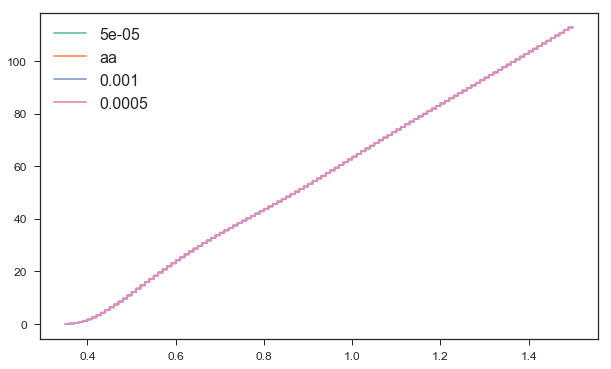

In [29]:
xval = np.arange(0.35, max(avg_rdf_data['aa'][:, 0]), 0.0001)
for r in avg_rdf_data:
    plt.plot(xval, ecf(avg_rdf_data[r], xval), label=r)
    pref, d, an = ks_test(ecf(avg_rdf_data[r], xval), ecf(avg_rdf_data['aa'], xval))
    print(r, d, an, pref)
plt.legend(loc=0)

#### bonds

In [30]:
bonds_res = defaultdict(list)
for f in os.listdir('structural_data/bonds/'):
    d = np.loadtxt(os.path.join('structural_data/bonds', f))
    dx = np.diff(d[:, 0])[0]
    s1 = np.sum(dx*d[:, 1])
    d[:, 1] /= s1
    if not f.endswith('hist'):
        continue
    if 'ref' in f:
        bonds_res['aa'].append(d)
    else:
        t = f.split('.')[0]
        r = test2res[t]
        bonds_res[r].append(d)

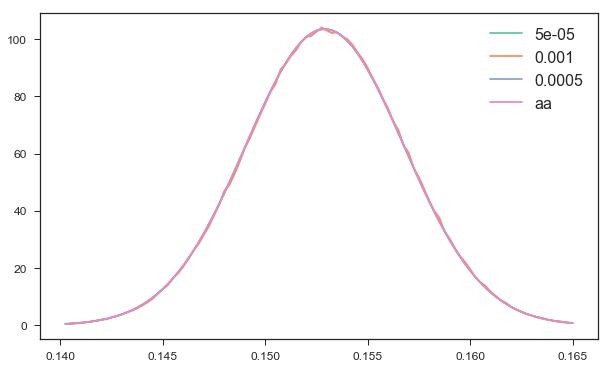

In [31]:
avg_bonds = {}
std_bonds = {}
for r in bonds_res:
    avg_bonds[r] = np.average(bonds_res[r], axis=0)
    std_bonds[r] = scipy.stats.sem(bonds_res[r], axis=0)
    plt.plot(avg_bonds[r][:, 0], avg_bonds[r][:, 1], label=r)
plt.legend(loc=0)

In [32]:
def ks_test(cdf1, cdf2):
    """Kolmogorov-Smirnov two sample test"""
    distance = np.max(cdf1 - cdf2)
    N = len(cdf1)
    M = len(cdf2)
    pref = np.sqrt((N*M) / (M+N))
    c_a = 1.36  # c(0.005)
    accept_null = distance < c_a/np.sqrt(N)
    return pref, distance, accept_null

In [33]:
xval = np.arange(min(avg_bonds['aa'][:, 0]), max(avg_bonds['aa'][:, 0]), 0.0001)

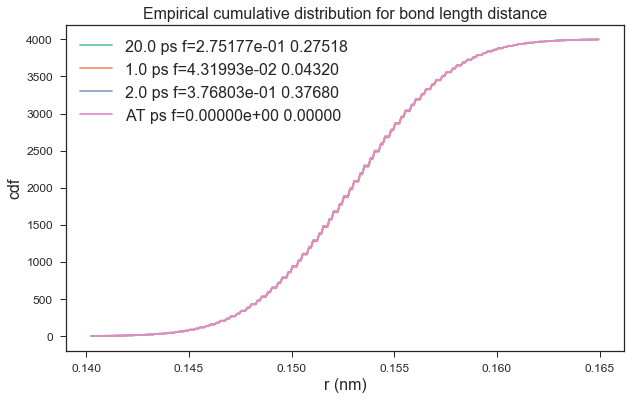

In [34]:
for r in avg_bonds:
    pref, d, an = ks_test(ecf(avg_bonds[r], xval), ecf(avg_bonds['aa'], xval))
    lbl = 'AT' if r == 'aa' else dt / r
    lbl = '{} ps f={:.5e} {:.5f}'.format(lbl, d, d)
    plt.plot(xval, ecf(avg_bonds[r], xval), label=lbl)
plt.legend(loc=0)
plt.title('Empirical cumulative distribution for bond length distance')
plt.xlabel('r (nm)')
plt.ylabel('cdf')
plt.savefig('dod_cdf_bond.pdf', dpi=200)

In [36]:
## squared difference
for r in avg_bonds:
    print(r, square_diff(avg_bonds['aa'], avg_bonds[r]))

5e-05 0.143471096781
0.001 7.75325809056
0.0005 0.119497284548
aa 0.0


#### angle

In [37]:
angle_res = defaultdict(list)
for f in os.listdir('structural_data/angle/'):
    d = np.loadtxt(os.path.join('structural_data/angle', f))
    if not f.endswith('hist'):
        continue
    if 'ref' in f:
        angle_res['aa'].append(d)
    else:
        t = f.split('.')[0]
        r = test2res[t]
        angle_res[r].append(d)

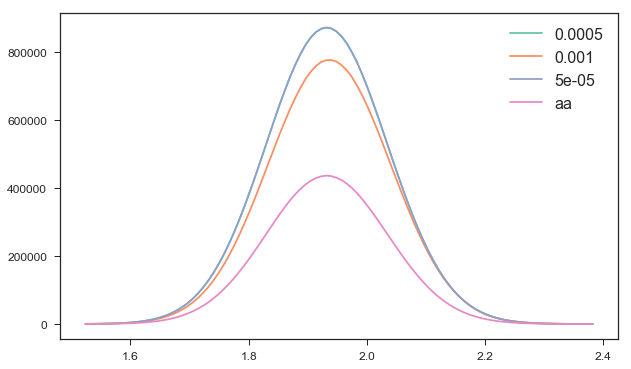

In [38]:
avg_angles = {}
std_angles = {}
for r in angle_res:
    avg_angles[r] = np.average(angle_res[r], axis=0)
    std_angles[r] = scipy.stats.sem(angle_res[r], axis=0)
    plt.plot(avg_angles[r][:, 0], avg_angles[r][:, 1], label=r)
plt.legend(loc=0)

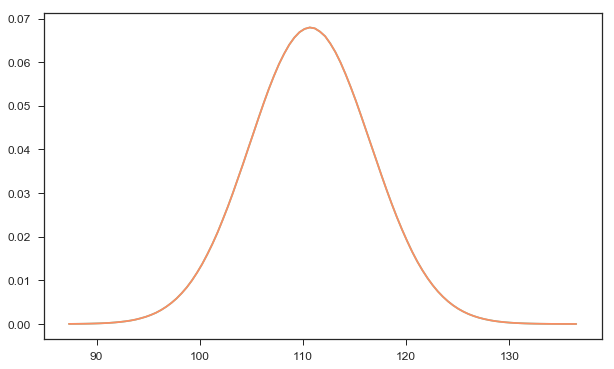

In [39]:
dx = np.diff(avg_angles['aa'][:, 0])[0]
s1 = np.sum(dx*avg_angles['aa'][:, 1])
s2 = np.rad2deg(s1)
#plt.plot(avg_angles['aa'][:, 0], avg_angles['aa'][:, 1]/s1)
plt.plot(np.rad2deg(avg_angles['aa'][:, 0]), avg_angles['aa'][:, 1]/s1/57.2958)
plt.plot(np.rad2deg(avg_angles['aa'][:, 0]), avg_angles['aa'][:, 1]/s2)

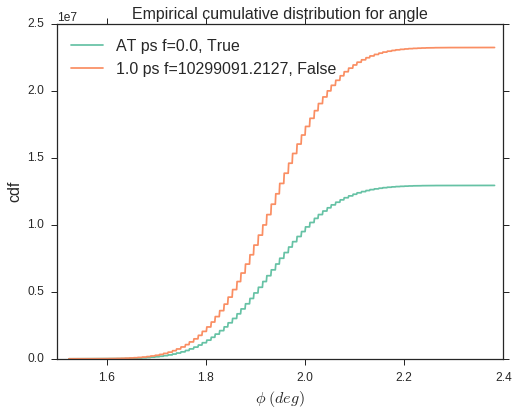

In [67]:
xval = np.arange(min(avg_angles['aa'][:, 0]), max(avg_angles['aa'][:, 0]), 0.001)
for r in avg_angles:
    if r not in [0.001, 'aa']:
        continue
    pref, d, an = ks_test(ecf(avg_angles[r], xval), ecf(avg_angles['aa'], xval))
    lbl = 'AT' if r == 'aa' else dt / r
    lbl = '{} ps f={}, {}'.format(lbl, d, an)
    plt.plot(xval, ecf(avg_angles[r], xval), label=lbl)
plt.legend(loc=0)
plt.title('Empirical cumulative distribution for angle')
plt.xlabel(r'$\phi \; (deg)$')
plt.ylabel('cdf')
#plt.xlim([1.6, 2.1])
#plt.ylim([0.2, 0.6])
#plt.savefig('dod_cdf_angle.pdf', dpi=200)

In [40]:
## squared difference
for r in avg_angles:
    print(r, square_diff(avg_angles['aa'], avg_angles[r]))

0.0005 1.77295291725e+12
0.001 1.39716468169e+12
5e-05 1.77235839853e+12
aa 0.0


#### dihedral

In [42]:
## squared difference
for r in avg_dihedrals:
    print(r, square_diff(avg_dihedrals['aa'], avg_dihedrals[r]))

NameError: name 'avg_dihedrals' is not defined

In [43]:
dx = np.diff(struct_data['bond_test_2.xvg'][:, 0])[0]
np.sum(struct_data['bond_test_2.xvg'][:, 1]*dx)

0.99899304963252555

### combine image

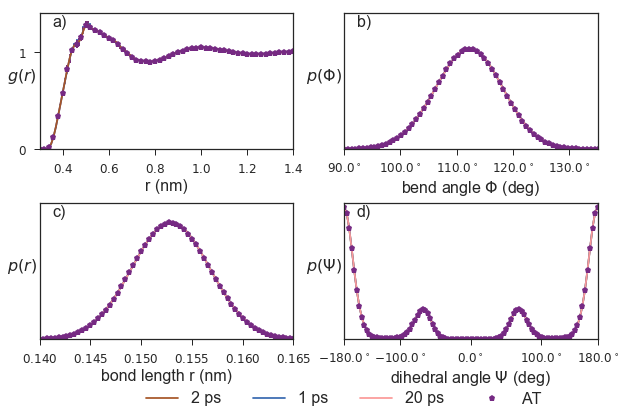

In [94]:
# Structural data
rcParams['figure.figsize'] = 10, 6
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(2, 2)
gs1.update(wspace=0.2, hspace=0.4)
ax1 = fig.add_subplot(gs1[0, 0]) # rdf
ax2 = fig.add_subplot(gs1[1, 0]) # bonds
ax3 = fig.add_subplot(gs1[0, 1]) # angles
ax4 = fig.add_subplot(gs1[1, 1])# dih
# ax5 = fig.add_subplot(gs1[3:, 0])

# RDF
an_1 = ax1.annotate(r'$g(r)$', xy=(-0.01, 0.5),  xycoords='axes fraction', fontsize=fonttitle, horizontalalignment='right')
an_11 = ax1.annotate('a)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
for k in rdf_data:
    if k == 'aa':
        continue
    ax1.errorbar(avg_rdf_data[k][:, 0], avg_rdf_data[k][:, 1], std_rdf_data[k][:, 1],
                 color=plot_colors[res2color[k]])
ax1.errorbar(avg_rdf_data[k][:, 0], avg_rdf_data[k][:, 1], std_rdf_data[k][:, 1], marker='p', linestyle='None',
             color=plot_colors[res2color['aa']], markevery=2)
ax1.set_xlim([0.3, 1.4])
ax1.set_ylim([0.0, 1.4])
ax1.set_yticks([0, 1.0])
# ax1.set_xticks([0.35, 0.5, 1.4])
ax1.set_xticklabels(map(r'${:.1f}$'.format, ax1.get_xticks()))
ax1.set_yticklabels(map(r'${:.0f}$'.format, ax1.get_yticks()))
ax1.set_xlabel(r'r (nm)')

# Bonds
an_2 = ax2.annotate(r'$p(r)$', xy=(-0.01, 0.5),  xycoords='axes fraction', fontsize=fonttitle, horizontalalignment='right')
an_21 = ax2.annotate('c)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
ax2.plot(struct_data['bond_test_2.xvg'][:, 0], struct_data['bond_test_2.xvg'][:, 1],
        color=plot_colors[res2color[test2res['test_2']]])
ax2.plot(struct_data['bond_test_1.xvg'][:, 0], struct_data['bond_test_1.xvg'][:, 1], 
        color=plot_colors[res2color[test2res['test_1']]])
ax2.plot(struct_data['bond_test_15.xvg'][:, 0], struct_data['bond_test_15.xvg'][:, 1], 
         color=plot_colors[res2color[test2res['test_15']]])
ax2.plot(struct_data['bond_ref.xvg'][:, 0], struct_data['bond_ref.xvg'][:, 1], 'p',
         color=plot_colors[res2color['aa']])
ax2.set_xlim(0.14, 0.165)
ax2.set_yticks([])
ax2.set_ylim([0, 120])
ax2.set_xlabel(r'bond length r (nm)')
# ax2.set_xticks([0.153])
ax2.set_yticklabels(map(r'${:.0f}$'.format, ax2.get_yticks()))
ax2.set_xticklabels(map(r'${:.3f}$'.format, ax2.get_xticks()))

# Angles
an_3 = ax3.annotate(r'$p(\Phi)$', xy=(-0.01, 0.5),  
                    xycoords='axes fraction', fontsize=fonttitle, horizontalalignment='right')
an_31 = ax3.annotate('b)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
ax3.plot(np.rad2deg(struct_data['angle_test_2.xvg'][:, 0]), struct_data['angle_test_2.xvg'][:, 1]/57.2958,
        color=plot_colors[res2color[test2res['test_2']]])
ax3.plot(np.rad2deg(struct_data['angle_test_1.xvg'][:, 0]), struct_data['angle_test_1.xvg'][:, 1]/57.2958, 
        color=plot_colors[res2color[test2res['test_1']]])
ax3.plot(np.rad2deg(struct_data['angle_test_15.xvg'][:, 0]), struct_data['angle_test_15.xvg'][:, 1]/57.2958, 
         color=plot_colors[res2color[test2res['test_15']]])
ax3.plot(np.rad2deg(struct_data['angle_ref.xvg'][:, 0]), struct_data['angle_ref.xvg'][:, 1]/57.2958, 'p',
         color=plot_colors[res2color['aa']])
ax3.set_yticks([])
ax3.set_xlim([90, 135])
ax3.set_ylim(0, 0.09)
# ax3.set_xticks([0, 112.0])
ax3.set_yticklabels(map(r'${}$'.format, ax3.get_yticks()))
ax3.set_xticklabels(map(r'${}^\circ$'.format, ax3.get_xticks()))
ax3.set_xlabel(r'bend angle $\Phi$ (deg)')

# Dihedral
an_4 = ax4.annotate(r'$p(\Psi)$', xy=(-0.01, 0.5),  xycoords='axes fraction', 
                    fontsize=fonttitle, horizontalalignment='right')
an_41 = ax4.annotate('d)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
ax4.plot(np.rad2deg(struct_data['dihedral_test_2.xvg'][:, 0]), 
         struct_data['dihedral_test_2.xvg'][:, 1]/57.2958,
         color=plot_colors[res2color[test2res['test_2']]], 
         label='{:.0f} ps'.format(dt/test2res['test_2']).rstrip('0'))
ax4.plot(np.rad2deg(struct_data['dihedral_test_1.xvg'][:, 0]), 
         struct_data['dihedral_test_1.xvg'][:, 1]/57.2958, 
         color=plot_colors[res2color[test2res['test_1']]], 
         label='{:.0f} ps'.format(dt/test2res['test_1']).rstrip('0'))
ax4.plot(np.rad2deg(struct_data['dihedral_test_15.xvg'][:, 0]), 
         struct_data['dihedral_test_15.xvg'][:, 1]/57.2958, 
         color=plot_colors[res2color[test2res['test_15']]], 
         label='{:.0f} ps'.format(dt/test2res['test_15']).rstrip('0'))
ax4.plot(np.rad2deg(struct_data['dihedral_ref.xvg'][:, 0]), 
         struct_data['dihedral_ref.xvg'][:, 1]/57.2958, 
         'p',
         color=plot_colors[res2color['aa']], label='AT')
ax4.set_yticks([])
ax4.set_ylim([0, 0.02])
ax4.set_xlim([-180, 180])
ax4.set_xticks([-180.0, -100, 0.0, 100, 180.0])
ax4.set_xticklabels(map(r'${}^\circ$'.format, ax4.get_xticks()))
ax4.set_yticklabels(map(r'${}$'.format, ax4.get_yticks()))
ax4.set_xlabel(r'dihedral angle $\Psi$ (deg)')

lgd = plt.legend(bbox_to_anchor=(0.0, -0.6), ncol=5, loc='lower center', frameon=False)
plt.savefig('dod_structure.pdf', dpi=300, bbox_extra_artists=[lgd, an_4, an_3, an_2, an_1], bbox_inches='tight')
# plt.savefig('dod_structure.png', dpi=300, bbox_extra_artists=[lgd, an_4, an_3, an_2, an_1], bbox_inches='tight')

In [72]:
msd_data = defaultdict(list)
msd_std_data = defaultdict(list)
msd_time_column = None
for f in os.listdir('msd_data'):
    t = '_'.join(f.split('_')[:2])
    r = test2res.get(t, 'aa')
    d = np.loadtxt('msd_data/{}'.format(f))
    msd_data[r].append(d)
    msd_time_column = d[:, 0]

avg_msd_data, std_msd_data = {}, {}
for k in msd_data:
    msd_data[k] = np.array(msd_data[k])
    avg_msd_data[k] = np.average(msd_data[k], axis=0)
    std_msd_data[k] = np.sqrt(np.average(np.array(msd_data[k])[:,:, 2]**2, axis=0))


In [73]:
acf_data = defaultdict(list)
acf_time_column = None
input_dir = 'acf_data'
for f in os.listdir(input_dir):
    if not os.path.isfile(os.path.join(input_dir, f)):
        continue
    t = '_'.join(f.split('_')[:2])
    r = test2res.get(t, 'aa')
    d = np.loadtxt('acf_data/{}'.format(f))    
    acf_data[r].append(d)
    acf_time_column = d[:, 0]

avg_acf_data, std_acf_data = {}, {}
for k in acf_data:
    acf_data[k] = np.array(acf_data[k])
    avg_acf_data[k] = np.average(acf_data[k], axis=0)
    std_acf_data[k] = np.sqrt(np.average(np.array(acf_data[k])[:,:, 2]**2, axis=0))

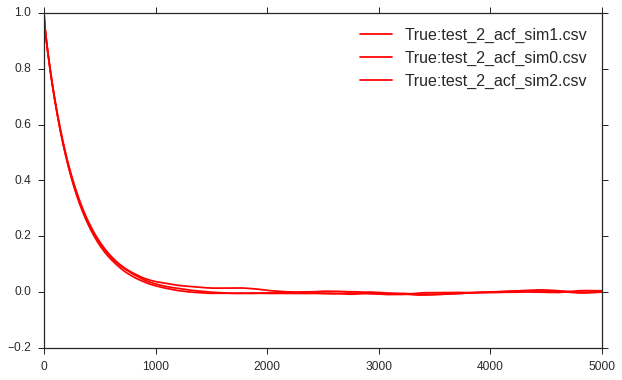

In [74]:
for f in os.listdir('acf_data'):
    if 'test_2' in f:
        t = '_'.join(f.split('_')[:2])
        r = test2res.get(t, 'aa')
        d = np.loadtxt('acf_data/{}'.format(f))
        st = len(f.split('_')) == 4
        if st:
            plt.plot(d[:, 0], d[:, 1], label='{}:{}'.format(st, f), color='red' if st else 'blue')
        else:
            norm = d[:, 1][0]
            plt.plot(d[:, 0], d[:, 1], label='{}:{}'.format(st, f), color='red' if st else 'blue')
plt.legend()

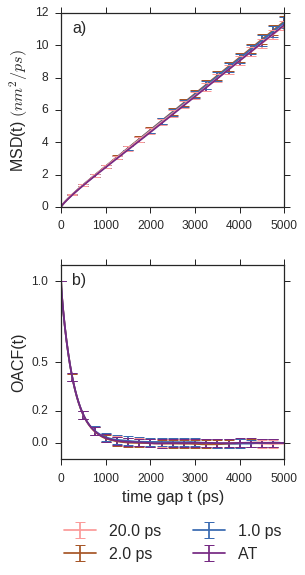

In [78]:
rcParams['figure.figsize'] = 4, 8
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(2, 1)
gs1.update(wspace=0.0, hspace=0.3)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[1, 0])

an_1 = ax1.annotate(r'a)', xy=(0.05, 0.9),  xycoords='axes fraction', 
                    fontsize=fonttitle)
# ax1.set_yticks([10**-2, 10**-1, 10**0, 10**1])
# ax1.set_yticklabels([10**-2, 10**-1, 10**0, 10**1])
for d in avg_msd_data:
    if d == 'aa':
        continue
    lbl = 'AT' if d == 'aa' else '{} ps'.format(dt/d).rstrip('0')
    ax1.errorbar(
        avg_msd_data[d][:, 0], 
        avg_msd_data[d][:, 1],
        std_msd_data[d],
        markevery=50,
        errorevery=50,
        capthick=1,
        capsize=5,
        color=plot_colors[res2color[d]], 
        label=lbl)
# Plot reference values
ax1.errorbar(
    avg_msd_data['aa'][:, 0], 
    avg_msd_data['aa'][:, 1], 
    std_msd_data['aa'],
    markevery=50,
    errorevery=50,
    color=plot_colors[res2color['aa']])
    
#ax1.set_yscale('log')
#ax1.set_xscale('log')
#ax1.set_xlim([1.0, 10**4])
# Gets values for 1000 and 2000
#ax1.set_xlabel(r'time gap $t \; (ps)$')
ax1.set_ylabel(r'MSD(t) $(nm^2 / ps)$')

# ACF
an_2 = ax2.annotate(r'b)', xy=(0.05, 0.9),  xycoords='axes fraction', 
             fontsize=fonttitle)
ax2.set_xlim([0, 5000.0])
ax2.set_ylim([-0.1, 1.1])
ax2.set_yticks([0.0, 0.2, 0.5, 1.0])
for d in sorted(acf_data):
    if d == 'aa':
        continue
    lbl = '{} ps'.format(dt/d).rstrip('0')
    ax2.errorbar(
        avg_acf_data[d][:, 0], 
        avg_acf_data[d][:, 1], 
        std_acf_data[d],
        color=plot_colors[res2color[d]], 
        capthick=1,
        capsize=5,
        label=lbl,
        errorevery=250)
# Plot reference values
ax2.errorbar(
    avg_acf_data['aa'][:, 0], 
    avg_acf_data['aa'][:, 1], 
    std_acf_data['aa'],
    capthick=1,
    capsize=5,
    label='AT',
    color=plot_colors[res2color['aa']], 
    errorevery=250)

ax2.set_xlabel(r'time gap t (ps)')
ax2.set_ylabel('OACF(t)')
lgd = plt.legend(bbox_to_anchor=(0.5, -0.6), ncol=2, loc='lower center', frameon=False)
plt.savefig('dod_dynamical.pdf', dpi=300, bbox_extra_artists=[lgd, an_1, an_2], bbox_inches='tight')
plt.savefig('dod_dynamical.png', dpi=300, bbox_extra_artists=[lgd, an_1, an_2], bbox_inches='tight')

In [ ]:
for d in sorted(avg_msd_data, cmp=lambda a, b: 1 if a == 'aa' or b == 'aa' else cmp(a, b)):
    if d == 'aa':
        lbl = 'AT'
        st = 'p'
    else:
        lbl = '{:.0f} ps'.format(dt/d)
        st = '-'
    plt.errorbar(
        avg_msd_data[d][:, 0],
        avg_msd_data[d][:, 1],
        std_msd_data[d],
        errorevery=10, 
        color=plot_colors[res2color[d]], label=lbl)

# Gets values for 1000 and 2000
plt.xlim(xmax=5000)
# plt.yticks([0.0, avg_msd_data['aa'][:, 1][200], avg_msd_data['aa'][:, 1][400]])
# plt.xticks([0, 1000, 2000])
plt.xlabel(r'time gap (ps)', fontsize=fontother)
plt.annotate(r'$nm^2 / ps$', xy=(-0.05, 1.02),  xycoords='axes fraction', 
             horizontalalignment='rigth', fontsize=22)
plt.title('Mean squared displacement', fontsize=28)
plt.legend(loc=0)
plt.savefig('dod_msd.png', dpi=300, bbox_inches='tight')

In [ ]:
rcParams['figure.figsize'] = 17, 10
for d in sorted(acf_data):
    if d == 'aa':
        continue
    print d
    lbl = '{} ps'.format(dt/d).rstrip('0')
    plt.plot(
        avg_acf_data[d][:, 0], 
        avg_acf_data[d][:, 1], 
        color=plot_colors[res2color[d]], 
        label=lbl)
plt.plot(
    avg_acf_data['aa'][:, 0], 
    avg_acf_data['aa'][:, 1], 
    label='AT',
    color=plot_colors[res2color['aa']])
plt.axhline(y=0.0, linewidth=1.0, linestyle='--')
#plt.yticks([0.0, 1.0])
#plt.yscale('log')
plt.ylim([-0.01, 0.05])
plt.ylabel('ln ACF', fontsize=fontother)
plt.xlabel(r'time gap (ps)', fontsize=fontother)
plt.title('Autocorrelation function of end-to-end vector', fontsize=fonttitle)
plt.legend(title=r'$\Delta t / \alpha$')
plt.savefig('dod_acf.pdf', dpi=300, bbox_inches='tight')

# Diffussion coefficient

In [ ]:
start_fit, stop_fit = 500, 1000
d_slopes = defaultdict(list)
err_slopes = defaultdict(list)
plt.yscale('log')
plt.xscale('log')
for r in ['aa', 0.001, 0.0005, 5e-05]:
    for ar in msd_data[r]:
        (d_slope, d_b), b_cov = numpy.polyfit(
            ar[:, 0][start_fit:stop_fit], 
            ar[:, 1][start_fit:stop_fit], 
            1,
            w=1.0/ar[:, 2][start_fit:stop_fit],
            cov=True)
        plt.plot(ar[:, 0], ar[:, 1])
        d_slopes[r].append((d_slope/6.0)*1000.0)
        err_slope = np.sqrt(b_cov[0][0])
        err_slopes[r].append(err_slope*1000.0)
    #print '{} D={:.4f} +/- {:.4f} nm^2/ps'.format(r, (d_slope/6.0)*1000.0, err_slope*1000.0)
for r in d_slopes:
    print r, np.average(d_slopes[r]), np.std(d_slopes[r])

## OACF coefficient

In [ ]:
start_fit, stop_fit = 0, 1000
d_slopes = defaultdict(list)
for r in acf_data:
    for ar in acf_data[r]:
        x = ar[:, 0][start_fit:stop_fit]
        y = np.log(ar[:, 1][start_fit:stop_fit])
        (d_slope, d_b, _, _, err_slope) = scipy.stats.linregress(x, y)
        d_slopes[r].append(-1.0/d_slope/1000.0)
        model = d_b + d_slope*x
        #plt.plot(x, y)
        #plt.plot(x, model)
for r in d_slopes:
    print('{} {:.2f} {:.2f}'.format(
            r if r == 'aa' else dt/r, 
            np.average(d_slopes[r]), 
            np.std(d_slopes[r])))

In [ ]:
start_fit, stop_fit = 0, 1000
d_slopes = defaultdict(list)
for r in acf_data:
    for ar in acf_data[r]:
        (ref_slope, ref_b), ref_cov = numpy.polyfit(
            ar[:, 0][start_fit:stop_fit],
            np.log(ar[:, 1][start_fit:stop_fit]),
            1,
            #w=np.log(ar[:, 2][start_fit:stop_fit]),
            cov=True
            )
        err_slope = np.sqrt(ref_cov[0][0])
        d_slopes[r].append((-1.0/ref_slope)/1000.0)
for r in d_slopes:
    print r, np.average(d_slopes[r]), np.std(d_slopes[r])

In [ ]:
start_fit, stop_fit = 0, 1000
for r in avg_acf_data:
    (ref_slope, ref_b), ref_cov = numpy.polyfit(
        avg_acf_data[r][:, 0][start_fit:stop_fit],
        np.log(avg_acf_data[r][:, 1][start_fit:stop_fit]),
        1,
        w=np.log(std_acf_data[r][start_fit:stop_fit]),
        cov=True
    )
    err_slope = np.sqrt(ref_cov[0][0])
    plt.plot(
        avg_acf_data[r][:, 0][start_fit:stop_fit],
        np.log(avg_acf_data[r][:, 1][start_fit:stop_fit]),
        label='aa' if r == 'aa' else dt/r)
    print '{:>7}: {:.4f} +/- {:.5f} ns'.format(r, (-1.0/ref_slope)/1000.0, np.exp(err_slope)/1000.0)
plt.legend()

# Density

In [ ]:
res_densities = {
    'test_1': np.array([448.045902141, 448.140149421, 448.152822826])*1.6605402,
    'test_2': np.array([448.167704918, 448.14884411, 448.287780135])*1.6605402,
    'test_15': np.array([448.201220908, 448.191314541, 448.113837657])*1.6605402
}
avg_res_densities = {test2res[k]: np.average(v) for k, v in res_densities.iteritems()}
std_res_densities = {test2res[k]: np.std(v) for k, v in res_densities.iteritems()}
for r in sorted(avg_res_densities):
    v = avg_res_densities[r]
    print('res {}: rho={} Std={}'.format(r, v, std_res_densities[r]))

ref_density = np.array([448.056960566, 448.097651169, 448.116399397, 448.056960566])*1.6605402
print 'ref rho={} std={}'.format(np.average(ref_density), np.std(ref_density))

## Calculate from block average

In [ ]:
volume_files = {f: np.loadtxt(os.path.join('density_data/', f)) for f in os.listdir('density_data/')}

In [ ]:
group_volume_files = defaultdict(list)
for f, d in volume_files.iteritems():
    t = 'AT' if 'ref' in f else test2res['_'.join(f.split('_')[:2])]
    group_volume_files[t].append(d)

In [ ]:
block_size = 200
mass_tot = 85169.999999999985*1.6605402
avg_group_density = {}
std_group_density = {}
for f in group_volume_files:
    avg_group_density[f] = mass_tot/np.average(group_volume_files[f])
    vrs = []
    for d in group_volume_files[f]:
        var = np.var(d) / (d.shape[0]/block_size)
        vrs.append(var)
    std_group_density[f] = np.sqrt(np.average(vrs))

In [ ]:
for v, d in avg_group_density.items():
    print '{} {:.2f} {:.2f}'.format(v, d, std_group_density[v])
    plt.errorbar(1, d, std_group_density[v], markeredgewidth=5.0, capthick=5.0, markersize=5.0, label=v)
plt.xlim([0.98, 1.02])
plt.legend()

In [ ]:
std_group_density

# Plots for poster SimForum

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
sns.set(style='ticks', palette='muted')

fonttitle=20
fontother=16

rcParams.update({'font.size': fontother, 
                 'legend.fontsize': fontother, 
                 'axes.titlesize': fonttitle,
                 'axes.labelsize': fonttitle,
                 'xtick.labelsize': fontother, 
                 'ytick.labelsize': fontother,
                 })

rcParams['figure.figsize'] = 18, 9
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(3, 3, width_ratios=[2,1.5,0.5])
gs1.update(wspace=0.1, hspace=0.4)
ax1 = fig.add_subplot(gs1[0:2,0:1])
ax2 = fig.add_subplot(gs1[0, 1])
ax3 = fig.add_subplot(gs1[1, 1:3])
ax4 = fig.add_subplot(gs1[2, 0:1])
ax5 = fig.add_subplot(gs1[2, 1:3])

# Potential energy
ax1.annotate('kJ/mol/N', xy=(-0.025, 1.015),  
             xycoords='axes fraction', horizontalalignment='right', fontsize=fonttitle)
yticks = [-2.210,3.870,7.095]
for r in sorted(avg_res_data):
    data = np.sum(avg_res_data[r][:, csv_cols['Epot']], axis=1)
    std_data = np.sqrt(np.sum(std_res_data[r][:, csv_cols['Epot']]**2, axis=1))
    ax1.plot(avg_res_data[r][:,0]*dt,  data, color=plot_colors[res2color[r]], 
                 label='{:.0f} ps'.format(dt/r).rstrip('0'))
yticks.append(np.average(np.sum(avg_res_data[0.00005][:, csv_cols['Epot']], axis=1)[:100]))
#ax1.set_xlim(0, 50)
ref_data_epot = np.sum(ref_data[:, ref_cols['Epot']][200:400], axis=1)
yticks.append(np.average(ref_data_epot))
ax1.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_epot,
    color=plot_colors[res2color['aa']],
    label='AT'
    )
ax1.axvline(x=20.0, linestyle='--', linewidth=1.0, color='k')
ax1.set_xticks([
        0.0,
        20.0,
        20.0 + dt/0.00005        
    ])
ax1.set_xticklabels([0.0, 20.0, '{} ps'.format(20.0 + dt/0.00005)])
ax1.set_yticks(yticks)
ax1.set_xlim(xmax=60)
ax1.set_title('Change in total potential energy during backmapping')

# RDF
ax2.plot(struct_data['A-A.dist.new.test_2'][:, 0], struct_data['A-A.dist.new.test_2'][:, 1],
        color=plot_colors[res2color[test2res['test_2']]])
ax2.plot(struct_data['A-A.dist.new.test_1'][:, 0], struct_data['A-A.dist.new.test_1'][:, 1], 
        color=plot_colors[res2color[test2res['test_1']]])
ax2.plot(struct_data['A-A.dist.new.test_11'][:, 0], struct_data['A-A.dist.new.test_11'][:, 1], 
         color=plot_colors[res2color[test2res['test_15']]])
ax2.plot(struct_data['A-A.dist.new.ref'][:, 0], struct_data['A-A.dist.new.ref'][:, 1], 'p',
        color=plot_colors[res2color['aa']])
ax2.set_xlim([0.3, 1.4])
ax2.set_yticks([1.0])
ax2.set_xticks([0.35, 1.4])
ax2.set_xticklabels([0.35, '1.4 nm'])
ax2.set_title('Radial distribution function')

# Bonds
ax3.plot(struct_data['bond_test_2.xvg'][:, 0], struct_data['bond_test_2.xvg'][:, 1],
        color=plot_colors[res2color[test2res['test_2']]])
ax3.plot(struct_data['bond_test_1.xvg'][:, 0], struct_data['bond_test_1.xvg'][:, 1], 
        color=plot_colors[res2color[test2res['test_1']]])
ax3.plot(struct_data['bond_test_15.xvg'][:, 0], struct_data['bond_test_15.xvg'][:, 1], 
         color=plot_colors[res2color[test2res['test_15']]])
ax3.plot(struct_data['bond_ref.xvg'][:, 0], struct_data['bond_ref.xvg'][:, 1], 'p',
         color=plot_colors[res2color['aa']])
ax3.set_xlim(0.135, 0.17)
ax3.set_yticks([])
ax3.set_xticks([0.153])
ax3.set_xticklabels(['0.153 nm'])
ax3.set_title('Bond length distribution')

# Angles
ax4.plot(np.rad2deg(struct_data['angle_test_2.xvg'][:, 0]), struct_data['angle_test_2.xvg'][:, 1],
        color=plot_colors[res2color[test2res['test_2']]])
ax4.plot(np.rad2deg(struct_data['angle_test_1.xvg'][:, 0]), struct_data['angle_test_1.xvg'][:, 1], 
         color=plot_colors[res2color[test2res['test_1']]])
ax4.plot(np.rad2deg(struct_data['angle_test_15.xvg'][:, 0]), struct_data['angle_test_15.xvg'][:, 1], 
         color=plot_colors[res2color[test2res['test_15']]])
ax4.plot(np.rad2deg(struct_data['angle_ref.xvg'][:, 0]), struct_data['angle_ref.xvg'][:, 1], 'p',
         color=plot_colors[res2color['aa']])
ax4.set_yticks([])
ax4.set_xlim([90, 135])
ax4.set_xticks([112.0])
ax4.set_xticklabels(map(r'${}^\circ$'.format, ax4.get_xticks()))
ax4.set_title('Angle distribution')

# Dihedral
ax5.plot(np.rad2deg(struct_data['dihedral_test_2.xvg'][:, 0]), struct_data['dihedral_test_2.xvg'][:, 1],
        color=plot_colors[res2color[test2res['test_2']]], label='{:.0f} ps'.format(dt/test2res['test_2']).rstrip('0'))
ax5.plot(np.rad2deg(struct_data['dihedral_test_1.xvg'][:, 0]), struct_data['dihedral_test_1.xvg'][:, 1], 
         color=plot_colors[res2color[test2res['test_1']]], label='{:.0f} ps'.format(dt/test2res['test_1']).rstrip('0'))
ax5.plot(np.rad2deg(struct_data['dihedral_test_15.xvg'][:, 0]), struct_data['dihedral_test_15.xvg'][:, 1], 
         color=plot_colors[res2color[test2res['test_15']]], label='{:.0f} ps'.format(dt/test2res['test_15']).rstrip('0'))
ax5.plot(np.rad2deg(struct_data['dihedral_ref.xvg'][:, 0]), struct_data['dihedral_ref.xvg'][:, 1], 'p',
         color=plot_colors[res2color['aa']], label='AT')
ax5.set_yticks([])
ax5.set_xlim([-180, 180])
ax5.set_xticks([-180.0, 0.0, 180.0])
ax5.set_xticklabels(map(r'${}^\circ$'.format, ax5.get_xticks()))
ax5.set_title('Dihedral distribution')

lgd = ax5.legend(fontsize=fontother, bbox_to_anchor=(0.0, -0.5), ncol=4, loc='lower center', frameon=True)
plt.savefig('dodecane-poster_plots.pdf', dpi=300, bbox_extra_artist=[lgd], bbox_inches = 'tight', pad_inches = 0)